In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


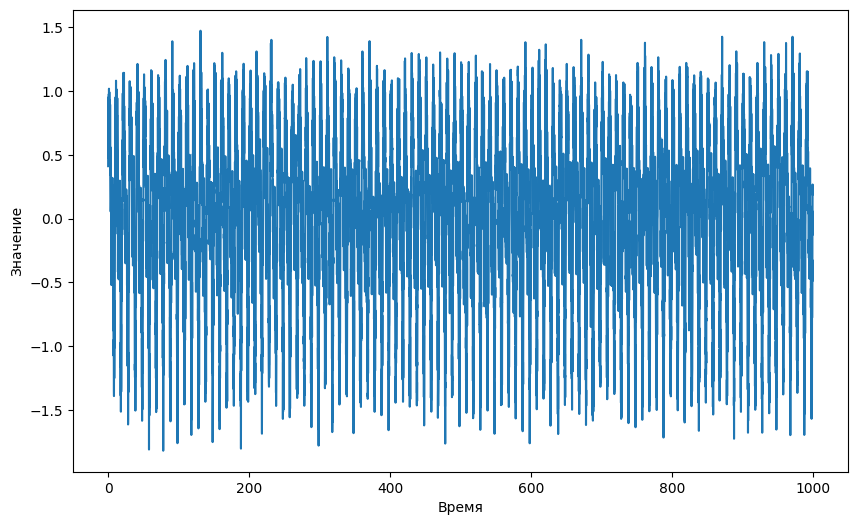

In [35]:
# Параметры временного ряда
t = np.linspace(0, 1000, 10000)  # Время
freq1, freq2, freq3 = 0.1, 0.2, 0.3  # Частоты
amp1, amp2, amp3 = 0.75, 0.5, 0.2  # Амплитуды

y = (amp1 * np.sin(2 * np.pi * freq1 * t) +
     amp2 * np.sin(2 * np.pi * freq2 * t) +
     amp3 * np.cos(2 * np.pi * freq3 * t))

# Шум
noise = np.random.normal(0, 0.2, len(t))
y += noise

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.xlabel('Время')
plt.ylabel('Значение')
plt.show()


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

def create_dataset(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 50
X, y = create_dataset(y_scaled, n_steps)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


## FFNN

In [37]:
model_ffnn = Sequential()
model_ffnn.add(Dense(64, activation='relu', input_dim=n_steps))
model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(1))

model_ffnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model_ffnn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/home/v131v/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


249/249 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 4.6949e-04 - loss: 0.2126
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 4.5796e-04 - loss: 0.0054
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0452e-04 - loss: 0.0050
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.9782e-04 - loss: 0.0051
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 4.3675e-04 - loss: 0.0049
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 2.9229e-04 - loss: 0.0047
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.2890e-04 - loss: 0.0047
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 3.6493e-04 - loss: 0.0048
Epoch 9/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 3.1385e-04 - loss: 0.0046
Epoch 10/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 2.2223e-04 - loss: 0.0044
Epoch 11/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.3504e-04 - loss: 0.0044
Epoch 12/50
249/249

## RNN

In [38]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(n_steps, 1)))
model_rnn.add(Dense(1))

model_rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50


/home/v131v/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 9.3878e-05 - loss: 0.0423
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 5.9696e-04 - loss: 0.0057
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 1.8966e-04 - loss: 0.0053
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 2.4145e-04 - loss: 0.0052
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 4.8419e-04 - loss: 0.0051
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 1.2208e-04 - loss: 0.0050
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 8.2505e-05 - loss: 0.0052
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 1.6532e-04 - loss: 0.0051
Epoch 9/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 2.1229e-04 - loss: 0.0048
Epoch 10/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 2.0476e-04 - loss: 0.0048
Epoch 11/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 1.6603e-04 - loss: 0.0050
Epoch 12

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MSE FFNN: 0.0452642118490239
MSE RNN: 0.04663147383585039
Упс ахах неловко вышло


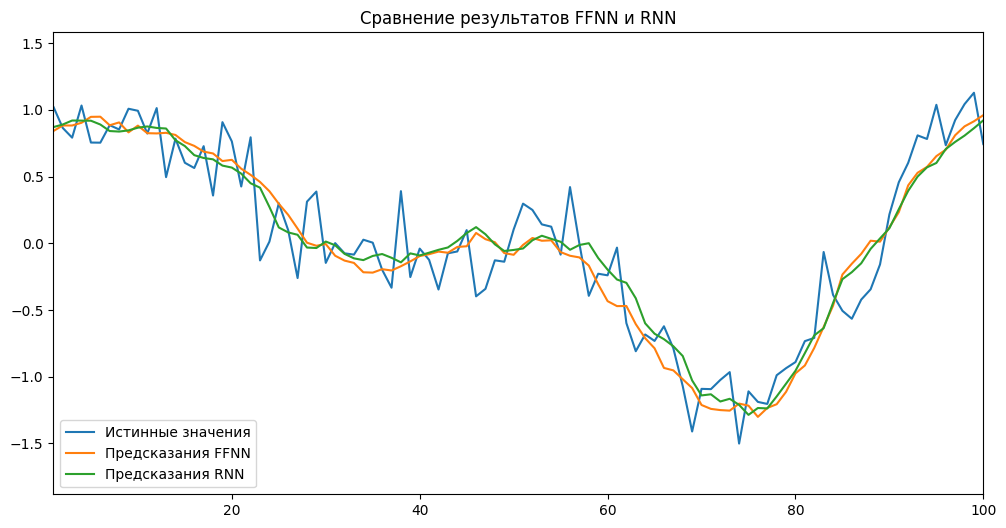

In [ ]:
y_pred_ffnn = model_ffnn.predict(X_test)
y_pred_rnn = model_rnn.predict(X_test_rnn)

# Обратная нормализация
y_pred_ffnn_rescaled = scaler.inverse_transform(y_pred_ffnn)
y_pred_rnn_rescaled = scaler.inverse_transform(y_pred_rnn)

mse_ffnn = mean_squared_error(scaler.inverse_transform(y_test), y_pred_ffnn_rescaled)
mse_rnn = mean_squared_error(scaler.inverse_transform(y_test), y_pred_rnn_rescaled)

print(f'MSE FFNN: {mse_ffnn}')
print(f'MSE RNN: {mse_rnn}')
print('Упс ахах неловко вышло')

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='Истинные значения')
plt.xlim([1, 100])
plt.plot(y_pred_ffnn_rescaled, label='Предсказания FFNN')
plt.plot(y_pred_rnn_rescaled, label='Предсказания RNN')
plt.legend()
plt.title('Сравнение результатов FFNN и RNN')
plt.show()


## LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(n_steps, 1)))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

model_lstm.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1)


/home/v131v/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 7.6694e-06 - loss: 0.1192
Epoch 2/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 3.0062e-04 - loss: 0.0064
Epoch 3/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 2.9202e-04 - loss: 0.0047
Epoch 4/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 1.6314e-04 - loss: 0.0043
Epoch 5/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 7.4695e-05 - loss: 0.0043
Epoch 6/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 1.2311e-04 - loss: 0.0041
Epoch 7/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 1.8831e-04 - loss: 0.0042
Epoch 8/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 3.1719e-04 - loss: 0.0043
Epoch 9/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 9.2455e-05 - loss: 0.0041
Epoch 10/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 8.6530e-04 - loss: 0.0042
Epoch 11/50
249/249 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 9.4997e-05 - loss: 0

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
MSE FFNN: 0.0452642118490239
MSE LSTM: 0.042529808596037236
Норм


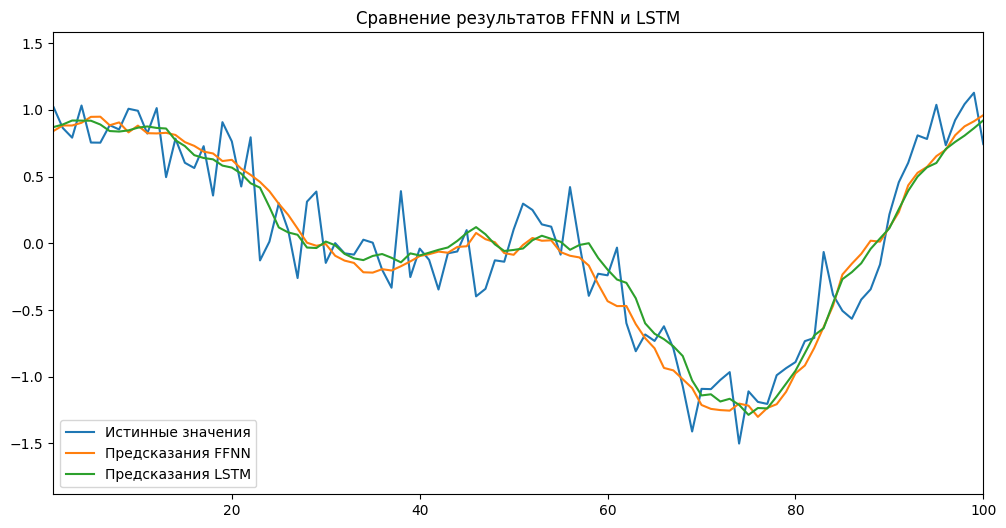

In [ ]:
y_pred_ffnn = model_ffnn.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test_rnn)

# Обратная нормализация
y_pred_ffnn_rescaled = scaler.inverse_transform(y_pred_ffnn)
y_pred_lstm_rescaled = scaler.inverse_transform(y_pred_lstm)

mse_ffnn = mean_squared_error(scaler.inverse_transform(y_test), y_pred_ffnn_rescaled)
mse_lstm = mean_squared_error(scaler.inverse_transform(y_test), y_pred_lstm_rescaled)

print(f'MSE FFNN: {mse_ffnn}')
print(f'MSE LSTM: {mse_lstm}')
print('Норм')

plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(y_test), label='Истинные значения')
plt.xlim([1, 100])
plt.plot(y_pred_ffnn_rescaled, label='Предсказания FFNN')
plt.plot(y_pred_rnn_rescaled, label='Предсказания LSTM')
plt.legend()
plt.title('Сравнение результатов FFNN и LSTM')
plt.show()
